<span style='font-size:20px'> Import des librairies + paramètres </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
#pd.options.display.float_format = '{:,.2f}'.format

In [2]:
## chargement des données
df = pd.read_sas("table_groupe1.sas7bdat",  format="sas7bdat")

In [3]:
df.head(5)

,identifiant_compte,Anciennete_compte,retard_courant,retard_min_6derniers_mois,retard_max_6derniers_mois,retard_min_12derniers_mois,retard_max_12derniers_mois,solde_courant,solde_courant_pct_max1to6m,solde_courant_pct_max1to12m,solde_courant_pct_moy1to6m,solde_courant_pct_moy1to12m,pct_utilisation_courant,pct_utilisation_min_1to6m,pct_utilisation_min_1to12m,pct_utilisation_max_1to6m,pct_utilisation_max_1to12m,pct_utilisation_moy_1to6m,pct_utilisation_moy_1to12m,achats_courant,achats_courant_pct_moy_1to6m,achats_courant_pct_moy_1to12m,avances_courant,paiements_courant,solde_courant_autres,solde_total_courant,solde_courant_autres_pct_limite,var_modeliser,statut_compte,type_residence_client,age_client,statut_matrimonial_client,score_actuel_compte
0,9683320.0,6.0,0.0,0.0,0.0,0.0,0.0,856.66,0.0,0.0,89.99,89.99,68.53,7.98,7.98,97.87,97.87,76.15,76.15,0.0,0.0,0.0,0.0,300.00,2436.69,3293.35,97.04,0.0,b'O',NaN,NaN,NaN,988.67350
1,9683327.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,0.00,0.00,0.00,0.00,0.00,5.79,5.79,1.93,1.93,0.0,-999.0,-999.0,0.0,231.50,810.20,810.20,11.57,0.0,b'O',NaN,NaN,NaN,987.02727
2,9683328.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-999.00,-999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-999.0,-999.0,0.0,0.00,0.00,0.00,0.00,0.0,b'O',NaN,NaN,NaN,977.20354
3,9683339.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-998.50,-998.50,0.00,-0.06,-0.06,0.00,0.00,-0.01,-0.01,0.0,-999.0,-999.0,0.0,118.08,3280.96,3280.96,65.62,0.0,b'O',b'P',20.0,b'1',993.14373
4,9683370.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-999.00,-999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-999.0,-999.0,0.0,0.00,0.00,0.00,0.00,0.0,b'O',NaN,NaN,NaN,987.89495


In [4]:
# On vois que les certaines variables sont dans un mauvais format, nous allons donc les decoder au format "utf-8"
df['statut_compte'] = df.statut_compte.str.decode(encoding="utf-8")
df['statut_matrimonial_client'] = df.statut_matrimonial_client.str.decode(encoding="utf-8")
df['type_residence_client'] = df.type_residence_client.str.decode(encoding="utf-8")

In [5]:
df.head()

,identifiant_compte,Anciennete_compte,retard_courant,retard_min_6derniers_mois,retard_max_6derniers_mois,retard_min_12derniers_mois,retard_max_12derniers_mois,solde_courant,solde_courant_pct_max1to6m,solde_courant_pct_max1to12m,solde_courant_pct_moy1to6m,solde_courant_pct_moy1to12m,pct_utilisation_courant,pct_utilisation_min_1to6m,pct_utilisation_min_1to12m,pct_utilisation_max_1to6m,pct_utilisation_max_1to12m,pct_utilisation_moy_1to6m,pct_utilisation_moy_1to12m,achats_courant,achats_courant_pct_moy_1to6m,achats_courant_pct_moy_1to12m,avances_courant,paiements_courant,solde_courant_autres,solde_total_courant,solde_courant_autres_pct_limite,var_modeliser,statut_compte,type_residence_client,age_client,statut_matrimonial_client,score_actuel_compte
0,9683320.0,6.0,0.0,0.0,0.0,0.0,0.0,856.66,0.0,0.0,89.99,89.99,68.53,7.98,7.98,97.87,97.87,76.15,76.15,0.0,0.0,0.0,0.0,300.00,2436.69,3293.35,97.04,0.0,O,NaN,NaN,NaN,988.67350
1,9683327.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,0.00,0.00,0.00,0.00,0.00,5.79,5.79,1.93,1.93,0.0,-999.0,-999.0,0.0,231.50,810.20,810.20,11.57,0.0,O,NaN,NaN,NaN,987.02727
2,9683328.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-999.00,-999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-999.0,-999.0,0.0,0.00,0.00,0.00,0.00,0.0,O,NaN,NaN,NaN,977.20354
3,9683339.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-998.50,-998.50,0.00,-0.06,-0.06,0.00,0.00,-0.01,-0.01,0.0,-999.0,-999.0,0.0,118.08,3280.96,3280.96,65.62,0.0,O,P,20.0,1,993.14373
4,9683370.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,-999.0,-999.0,-999.00,-999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-999.0,-999.0,0.0,0.00,0.00,0.00,0.00,0.0,O,NaN,NaN,NaN,987.89495


In [6]:
df.shape

(24877, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   identifiant_compte               24877 non-null  float64
 1   Anciennete_compte                24877 non-null  float64
 2   retard_courant                   24877 non-null  float64
 3   retard_min_6derniers_mois        24857 non-null  float64
 4   retard_max_6derniers_mois        24857 non-null  float64
 5   retard_min_12derniers_mois       24857 non-null  float64
 6   retard_max_12derniers_mois       24857 non-null  float64
 7   solde_courant                    24877 non-null  float64
 8   solde_courant_pct_max1to6m       24877 non-null  float64
 9   solde_courant_pct_max1to12m      24877 non-null  float64
 10  solde_courant_pct_moy1to6m       24877 non-null  float64
 11  solde_courant_pct_moy1to12m      24877 non-null  float64
 12  pct_utilisation_co

In [8]:
# distributions
pd.DataFrame(df.describe())

,identifiant_compte,Anciennete_compte,retard_courant,retard_min_6derniers_mois,retard_max_6derniers_mois,retard_min_12derniers_mois,retard_max_12derniers_mois,solde_courant,solde_courant_pct_max1to6m,solde_courant_pct_max1to12m,solde_courant_pct_moy1to6m,solde_courant_pct_moy1to12m,pct_utilisation_courant,pct_utilisation_min_1to6m,pct_utilisation_min_1to12m,pct_utilisation_max_1to6m,pct_utilisation_max_1to12m,pct_utilisation_moy_1to6m,pct_utilisation_moy_1to12m,achats_courant,achats_courant_pct_moy_1to6m,achats_courant_pct_moy_1to12m,avances_courant,paiements_courant,solde_courant_autres,solde_total_courant,solde_courant_autres_pct_limite,var_modeliser,age_client,score_actuel_compte
count,2.487700e+04,24877.000000,24877.000000,24857.000000,24857.000000,24857.000000,24857.000000,24877.000000,24877.000000,24877.000000,2.487700e+04,2.487700e+04,24877.000000,24857.000000,24857.000000,24857.000000,24857.000000,24877.000000,24877.000000,24877.000000,2.487700e+04,2.487700e+04,24877.000000,24877.000000,24877.000000,24877.000000,24877.000000,24877.000000,10463.000000,24877.000000
mean,9.861424e+06,3.138481,0.048036,-137.013718,-136.940097,-137.013718,-136.940097,287.378150,-625.161075,-625.161075,4.615254e+02,4.615254e+02,14.933089,-135.283309,-135.283309,-120.494706,-120.494706,-128.253898,-128.253898,167.139996,-5.464952e+02,-5.464952e+02,23.659693,181.999495,1272.378853,1559.757003,-159.287279,0.028540,38.791933,980.640289
std,1.096993e+05,1.990025,0.250710,343.270650,343.300157,343.270650,343.300157,937.514916,2272.789509,2272.789509,1.272121e+05,1.272121e+05,29.845169,350.238658,350.238658,351.142710,351.142710,348.739015,348.739015,632.339754,8.677868e+03,8.677868e+03,228.735146,574.682255,2454.912603,2626.223553,813.212607,0.166514,18.085990,50.225622
min,9.683320e+06,0.000000,0.000000,-997.000000,-997.000000,-997.000000,-997.000000,-5121.710000,-999.000000,-999.000000,-6.465000e+04,-6.465000e+04,-506.570000,-9988.000000,-9988.000000,-997.000000,-997.000000,-2497.000000,-2497.000000,0.000000,-9.990000e+02,-9.990000e+02,0.000000,0.000000,0.000000,-2708.390000,-999.000000,0.000000,16.000000,34.261030
25%,9.760231e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.990000e+02,-9.990000e+02,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000,21.000000,983.844030
50%,9.865566e+06,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-9.970000e+02,-9.970000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.990000e+02,-9.990000e+02,0.000000,0.000000,286.410000,755.910000,6.570000,0.000000,36.000000,990.369630
75%,9.962328e+06,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.830000,0.000000,0.000000,1.001600e+02,1.001600e+02,14.640000,0.000000,0.000000,17.010000,17.010000,8.810000,8.810000,53.820000,0.000000e+00,0.000000e+00,0.000000,145.000000,1759.950000,2082.260000,49.470000,0.000000,54.000000,994.407710
max,1.005864e+07,6.000000,3.000000,1.000000,3.000000,1.000000,3.000000,19944.640000,342448.200000,342448.200000,1.991820e+07,1.991820e+07,549.500000,218.060000,218.060000,365.750000,365.750000,218.060000,218.060000,21801.650000,1.360009e+06,1.360009e+06,18807.940000,15107.590000,48828.190000,62843.810000,110672.000000,1.000000,90.000000,999.295720


In [9]:
df["identifiant_compte"] = df["identifiant_compte"].astype('int64').astype('category')
df["var_modeliser"] = df["var_modeliser"].astype('int64').astype('category')
df.rename(columns = {'var_modeliser':'defaut_paiement'}, inplace=True)

## Analyse exploratoire

<span style='font-size:18px'> Cette section contient quelques fonctions utiles. Elles aideront à comprendre le problème, l'analyse exploratoire des données ainsi que le prétraitement.</span>

<!-- - <span style='font-size:18px'>Réduire l'utilisation de la mémoire</span> 
- <span style='font-size:18px'>Encodeur à un coup</span>-->
- <span style='font-size:18px'>Trouver les noms et les types de colonnes</span>
- <span style='font-size:18px'>Analyse des variables catégorielles</span>
- <span style='font-size:18px'>Tracer des variables numériques</span>
- <span style='font-size:18px'>Trouver des corrélations élevées</span>
- <span style='font-size:18px'>Tracer des corrélations</span>
- <span style='font-size:18px'>Valeur manquante</span>
- <span style='font-size:18px'>Fonctions quantiles pour les agrégations</span>

In [10]:
# Categorical Variables & Target
def analys_var_categ(dataframe, variable, target = None):
    #print(variable)
    if target == None:
        res = pd.DataFrame({#print(
            "Nombre": dataframe[variable].value_counts(),
            "Ratio": dataframe[variable].value_counts() / len(dataframe)})#, end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        res = pd.DataFrame({#print(
            "Nombre":dataframe[variable].value_counts(),
            "Ratio":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()})#, end="\n\n\n")
    return res

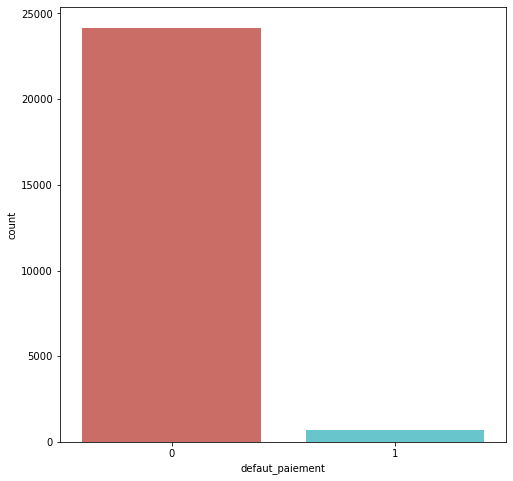

In [11]:
plt.rcParams["figure.figsize"]=(8,8)
sns.countplot(x='defaut_paiement', data=df, palette='hls')
plt.savefig('defaut_paiement.jpeg')
plt.show()

In [12]:
analys_var_categ(df,'defaut_paiement')

,Nombre,Ratio
0,24167,0.97146
1,710,0.02854


<span style='font-size:18px'> Le résultat montre que nous disposons d'un taux de défaut de paiement de `2.85%` dans le jeu de données.</span>

In [13]:
analys_var_categ(df,'statut_compte')

,Nombre,Ratio
O,23501,0.944688
P,1376,0.055312


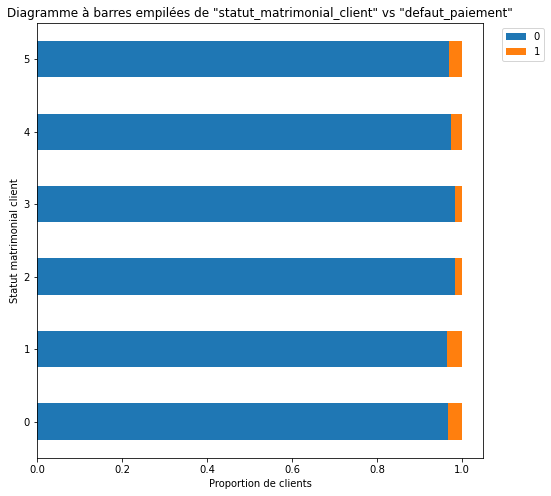

In [14]:
table=pd.crosstab(df.statut_matrimonial_client,df.defaut_paiement)
ax = table.div(table.sum(1).astype(float), axis=0).plot.barh(stacked=True, edgecolor='none') #.plot(kind='bar', stacked=True, figsize=(15,8))
plt.rcParams["figure.figsize"]=(12,8)
plt.title('Diagramme à barres empilées de "statut_matrimonial_client" vs "defaut_paiement"')
plt.ylabel('Statut matrimonial client')
plt.xlabel('Proportion de clients')
#plt.legend(loc='upper right')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

plt.show()
#plt.savefig('edu_vs_pur_stack')

In [15]:
analys_var_categ(df,'statut_matrimonial_client')

,Nombre,Ratio
1,4194,0.168589
2,2035,0.081802
5,1430,0.057483
0,1227,0.049323
4,450,0.018089
3,191,0.007678


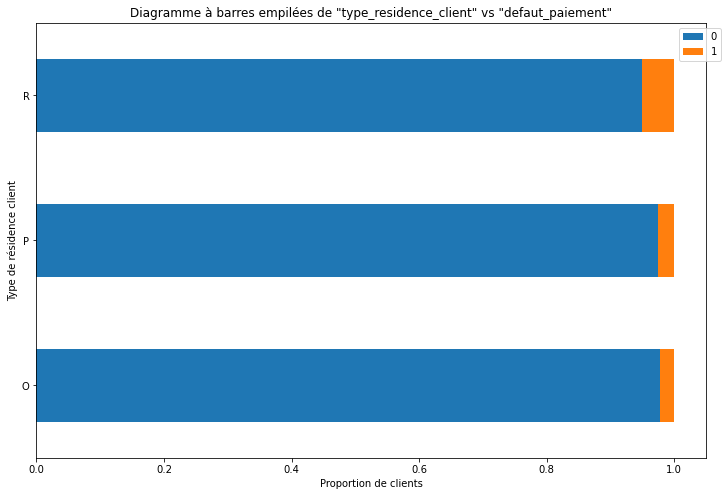

In [16]:
table=pd.crosstab(df.type_residence_client,df.defaut_paiement)
ax=table.div(table.sum(1).astype(float), axis=0).plot.barh(stacked=True, edgecolor='none') #.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"]=(8,8)
plt.title('Diagramme à barres empilées de "type_residence_client" vs "defaut_paiement"')
plt.ylabel('Type de résidence client')
plt.xlabel('Proportion de clients')

horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
#plt.savefig('edu_vs_pur_stack')
plt.show()

In [17]:
analys_var_categ(df, 'type_residence_client')

,Nombre,Ratio
P,4282,0.172127
O,3912,0.157254
R,2269,0.091209


In [18]:
# Grab Column Names
def grab_col_names(dataframe, show_date=False): 
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns.tolist()

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    
    if show_date == True:
        return date_cols, cat_cols, num_cols #, cat_but_car, num_but_cat
    else:
        return cat_cols, num_cols #, cat_but_car, num_but_cat

In [19]:
# Columns
cat_cols, num_cols = grab_col_names(df)

print("")

# Variables catégorielles
print(cat_cols)

Observations: 24877
Variables: 33
date_cols: 0
cat_cols: 5
num_cols: 28

['identifiant_compte', 'defaut_paiement', 'statut_compte', 'type_residence_client', 'statut_matrimonial_client']


```python
# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

# Quick Visualization for numerical variables
num_plot(df, num_cols=num_cols, remove=['identifiant_compte'], figsize = (15,3))
```

## Etude de correlation et selection de variables

In [20]:
# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "spearman", figsize=(12, 12)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

In [21]:
# fonction pour voir les fortes crrelations entre les variables
def high_correlation(data, remove=['id'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n") 

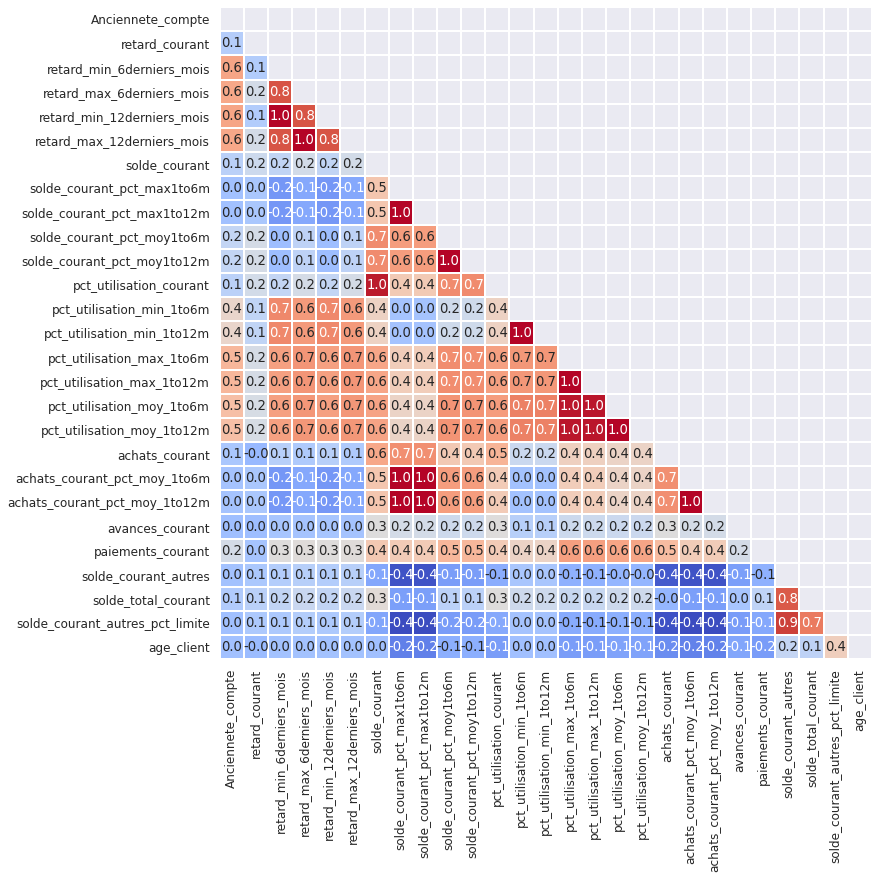

In [22]:
# Correlation des différentes variables
corr_plot(df, remove=['identifiant_compte','score_actuel_compte'], corr_coef = "spearman")

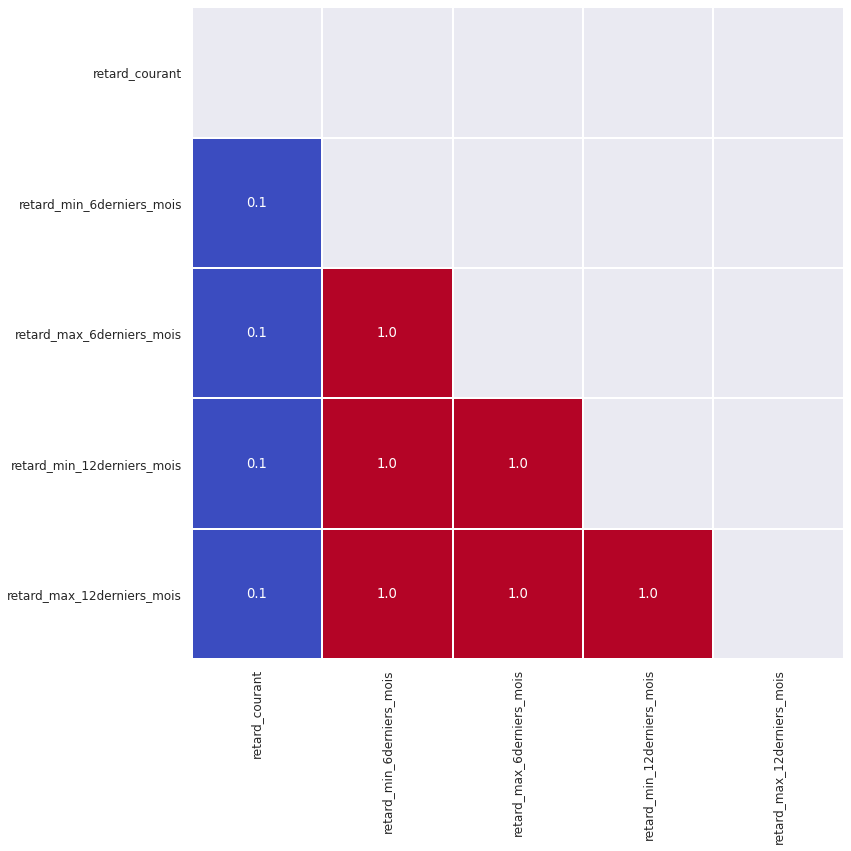

In [23]:
# Correlation des variables de familles "retard"
corr_plot(df[['retard_courant','retard_min_6derniers_mois', 'retard_max_6derniers_mois','retard_min_12derniers_mois', 'retard_max_12derniers_mois']],\
          corr_coef = "pearson")

In [24]:
high_correlation(df[['retard_courant','retard_min_6derniers_mois', 'retard_max_6derniers_mois','retard_min_12derniers_mois', 'retard_max_12derniers_mois']])

retard_min_6derniers_mois
-------------------------------
retard_min_12derniers_mois    1.0
retard_max_12derniers_mois    1.0
retard_max_6derniers_mois     1.0
Name: retard_min_6derniers_mois, dtype: float64


retard_max_6derniers_mois
-------------------------------
retard_max_12derniers_mois    1.0
retard_min_12derniers_mois    1.0
retard_min_6derniers_mois     1.0
Name: retard_max_6derniers_mois, dtype: float64


retard_min_12derniers_mois
-------------------------------
retard_min_6derniers_mois     1.0
retard_max_12derniers_mois    1.0
retard_max_6derniers_mois     1.0
Name: retard_min_12derniers_mois, dtype: float64


retard_max_12derniers_mois
-------------------------------
retard_max_6derniers_mois     1.0
retard_min_12derniers_mois    1.0
retard_min_6derniers_mois     1.0
Name: retard_max_12derniers_mois, dtype: float64




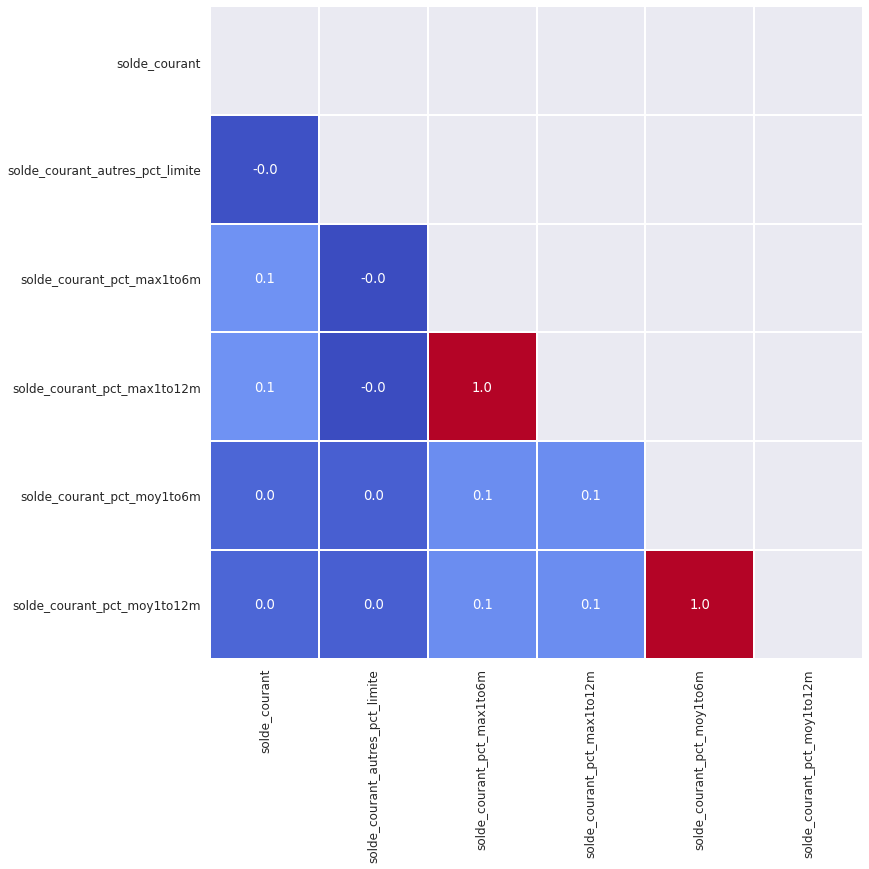

In [25]:
# Correlation des variables de familles "solde"
corr_plot(df[['solde_courant','solde_courant_autres_pct_limite','solde_courant_pct_max1to6m','solde_courant_pct_max1to12m', 'solde_courant_pct_moy1to6m','solde_courant_pct_moy1to12m']],\
          corr_coef = "pearson")

In [26]:
high_correlation(df[['solde_courant','solde_courant_autres_pct_limite','solde_courant_pct_max1to6m','solde_courant_pct_max1to12m', 'solde_courant_pct_moy1to6m','solde_courant_pct_moy1to12m']])

solde_courant_pct_max1to6m
-------------------------------
solde_courant_pct_max1to12m    1.0
Name: solde_courant_pct_max1to6m, dtype: float64


solde_courant_pct_max1to12m
-------------------------------
solde_courant_pct_max1to6m    1.0
Name: solde_courant_pct_max1to12m, dtype: float64


solde_courant_pct_moy1to6m
-------------------------------
solde_courant_pct_moy1to12m    1.0
Name: solde_courant_pct_moy1to6m, dtype: float64


solde_courant_pct_moy1to12m
-------------------------------
solde_courant_pct_moy1to6m    1.0
Name: solde_courant_pct_moy1to12m, dtype: float64




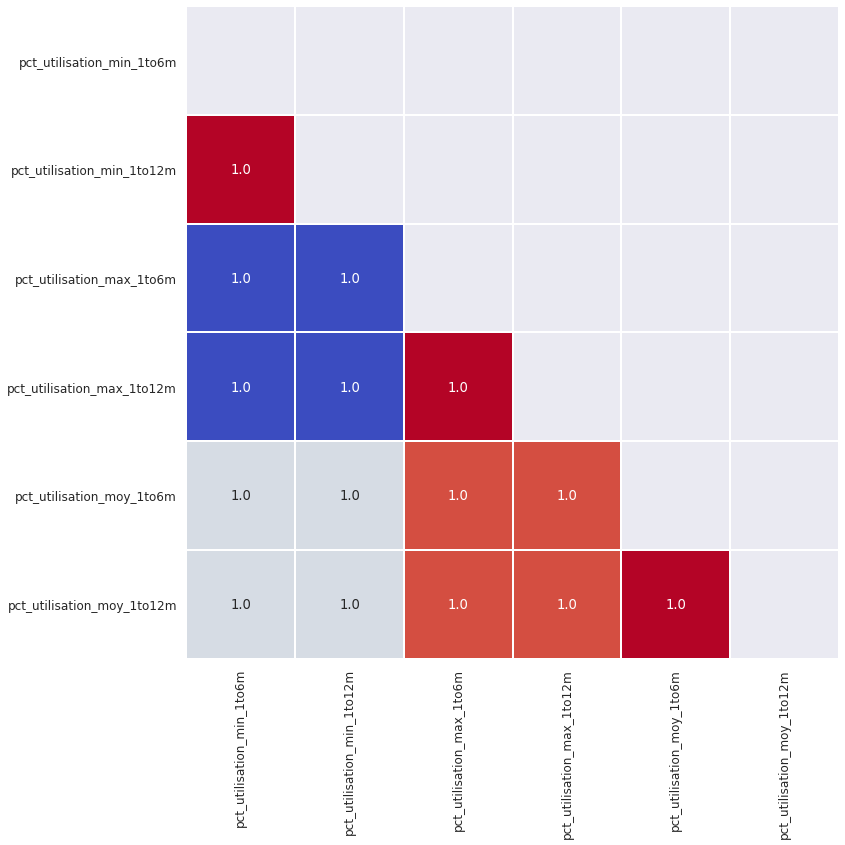

In [27]:
# Correlation des variables de familles "utilisation"
corr_plot(df[['pct_utilisation_min_1to6m', 'pct_utilisation_min_1to12m', 'pct_utilisation_max_1to6m', 'pct_utilisation_max_1to12m',
       'pct_utilisation_moy_1to6m', 'pct_utilisation_moy_1to12m']], corr_coef = "pearson")

In [28]:
high_correlation(df[['pct_utilisation_min_1to6m', 'pct_utilisation_min_1to12m', 'pct_utilisation_max_1to6m', 'pct_utilisation_max_1to12m',
       'pct_utilisation_moy_1to6m', 'pct_utilisation_moy_1to12m']])

pct_utilisation_min_1to6m
-------------------------------
pct_utilisation_min_1to12m    1.000000
pct_utilisation_moy_1to12m    0.989486
pct_utilisation_moy_1to6m     0.989486
pct_utilisation_max_1to12m    0.979976
pct_utilisation_max_1to6m     0.979976
Name: pct_utilisation_min_1to6m, dtype: float64


pct_utilisation_min_1to12m
-------------------------------
pct_utilisation_min_1to6m     1.000000
pct_utilisation_moy_1to12m    0.989486
pct_utilisation_moy_1to6m     0.989486
pct_utilisation_max_1to12m    0.979976
pct_utilisation_max_1to6m     0.979976
Name: pct_utilisation_min_1to12m, dtype: float64


pct_utilisation_max_1to6m
-------------------------------
pct_utilisation_max_1to12m    1.000000
pct_utilisation_moy_1to12m    0.998177
pct_utilisation_moy_1to6m     0.998177
pct_utilisation_min_1to12m    0.979976
pct_utilisation_min_1to6m     0.979976
Name: pct_utilisation_max_1to6m, dtype: float64


pct_utilisation_max_1to12m
-------------------------------
pct_utilisation_max_1to6m     

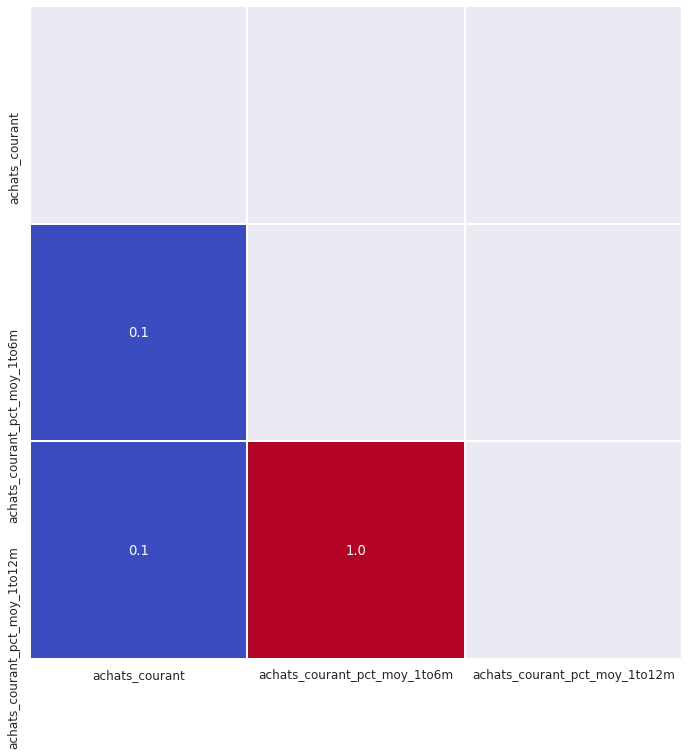

In [29]:
# Correlation des variables de familles "achat"
corr_plot(df[['achats_courant','achats_courant_pct_moy_1to6m', 'achats_courant_pct_moy_1to12m']], corr_coef = "pearson")

In [30]:
high_correlation(df[['achats_courant','achats_courant_pct_moy_1to6m', 'achats_courant_pct_moy_1to12m']])

achats_courant_pct_moy_1to6m
-------------------------------
achats_courant_pct_moy_1to12m    1.0
Name: achats_courant_pct_moy_1to6m, dtype: float64


achats_courant_pct_moy_1to12m
-------------------------------
achats_courant_pct_moy_1to6m    1.0
Name: achats_courant_pct_moy_1to12m, dtype: float64




In [31]:
# selection de variables
df_final = df[['defaut_paiement','Anciennete_compte', 'retard_courant','retard_min_6derniers_mois','solde_courant_autres_pct_limite','solde_courant_pct_max1to12m',\
              'solde_courant','age_client','achats_courant','achats_courant_pct_moy_1to6m','solde_courant_autres','avances_courant','type_residence_client',\
              'paiements_courant','pct_utilisation_moy_1to6m','statut_compte','statut_matrimonial_client']].copy()

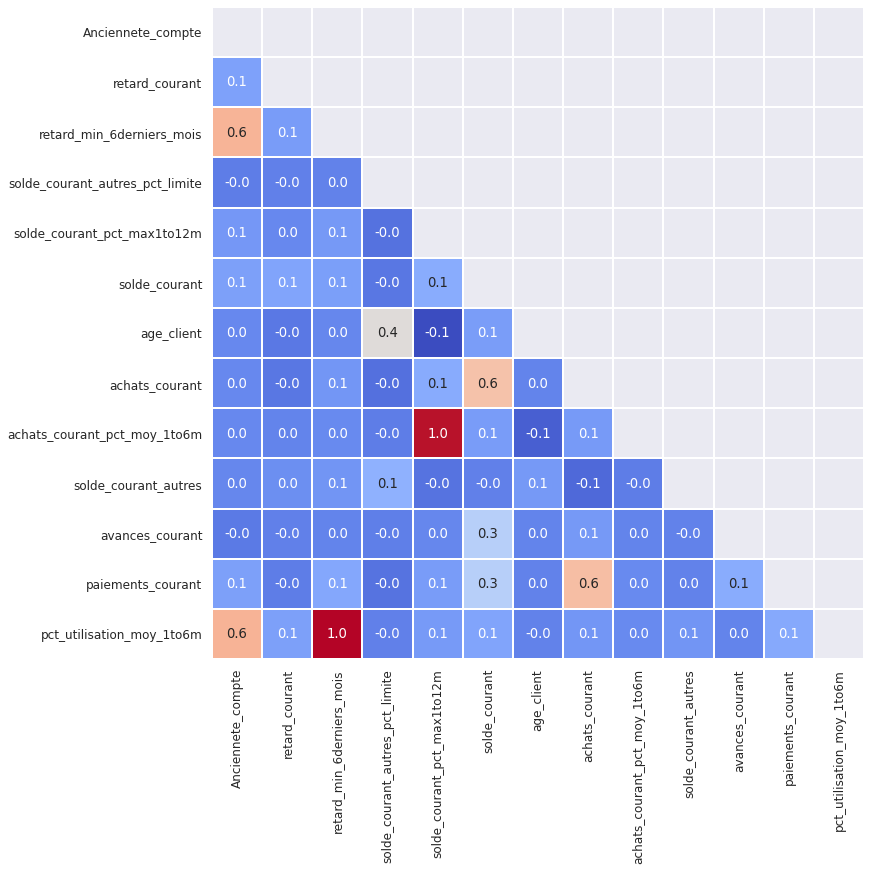

In [32]:
# Correlation des différentes variables
corr_plot(df_final, corr_coef = "pearson")

<span style='font-size:18px'> On vois une forte correlation entre les variables `achats_courant_pct_moy_1to6m` et `solde_courant_pct_max1to12m` </span>

In [33]:
high_correlation(df_final)

retard_min_6derniers_mois
-------------------------------
pct_utilisation_moy_1to6m    0.997245
Name: retard_min_6derniers_mois, dtype: float64


solde_courant_pct_max1to12m
-------------------------------
achats_courant_pct_moy_1to6m    0.980512
Name: solde_courant_pct_max1to12m, dtype: float64


achats_courant_pct_moy_1to6m
-------------------------------
solde_courant_pct_max1to12m    0.980512
Name: achats_courant_pct_moy_1to6m, dtype: float64


pct_utilisation_moy_1to6m
-------------------------------
retard_min_6derniers_mois    0.997245
Name: pct_utilisation_moy_1to6m, dtype: float64




In [34]:
df_model = df_final.drop(columns=['retard_min_6derniers_mois','solde_courant_pct_max1to12m']).copy()

In [35]:
df_model.shape

(24877, 15)

## Traitement des valeurs manquantes

In [36]:
df_model.isnull().sum()

defaut_paiement                        0
Anciennete_compte                      0
retard_courant                         0
solde_courant_autres_pct_limite        0
solde_courant                          0
age_client                         14414
achats_courant                         0
achats_courant_pct_moy_1to6m           0
solde_courant_autres                   0
avances_courant                        0
type_residence_client              14414
paiements_courant                      0
pct_utilisation_moy_1to6m              0
statut_compte                          0
statut_matrimonial_client          15350
dtype: int64

In [37]:
df_model['statut_matrimonial_client']= df_model['statut_matrimonial_client'].replace(np.nan, '9')
df_model['type_residence_client'] = df_model['type_residence_client'].replace(np.nan, 'M')

### Discrétisation des variables

In [38]:
df_model.describe()

,Anciennete_compte,retard_courant,solde_courant_autres_pct_limite,solde_courant,age_client,achats_courant,achats_courant_pct_moy_1to6m,solde_courant_autres,avances_courant,paiements_courant,pct_utilisation_moy_1to6m
count,24877.000000,24877.000000,24877.000000,24877.000000,10463.000000,24877.000000,2.487700e+04,24877.000000,24877.000000,24877.000000,24877.000000
mean,3.138481,0.048036,-159.287279,287.378150,38.791933,167.139996,-5.464952e+02,1272.378853,23.659693,181.999495,-128.253898
std,1.990025,0.250710,813.212607,937.514916,18.085990,632.339754,8.677868e+03,2454.912603,228.735146,574.682255,348.739015
min,0.000000,0.000000,-999.000000,-5121.710000,16.000000,0.000000,-9.990000e+02,0.000000,0.000000,0.000000,-2497.000000
25%,1.000000,0.000000,0.000000,0.000000,21.000000,0.000000,-9.990000e+02,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,6.570000,0.000000,36.000000,0.000000,-9.990000e+02,286.410000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,49.470000,167.830000,54.000000,53.820000,0.000000e+00,1759.950000,0.000000,145.000000,8.810000
max,6.000000,3.000000,110672.000000,19944.640000,90.000000,21801.650000,1.360009e+06,48828.190000,18807.940000,15107.590000,218.060000


In [39]:
# définition d'une fonction pour la distribution des quartiles à valeurs positives
def quartiles_valeurs_positives(df,variable):
    tmp = pd.DataFrame(df_model[df_model[variable]>0][variable].describe())
    return tmp

In [40]:
df_model['statut_compte_cat'] = df_model['statut_compte'].replace(['O','P'], ['1','2'])
df_model['type_residence_client_cat'] = df_model['type_residence_client'].replace(['M','O','P','R'], ['1','2','3','4'])
df_model['statut_matrimonial_client_cat']= df_model['statut_matrimonial_client'].replace(['0','1','2','3','4','5','9'], ['1','2','3','4','5','6','9'])

In [41]:
df_model['retard_courant_cat'] = pd.cut(df_model.retard_courant, bins = 2, labels=['1', '2']) 

In [42]:
df_model['age_client_cat'] = pd.cut(df_model.age_client,bins=4,labels=['-21ans','22-36ans','37-54ans','+54ans']) # #['1','2','3','4']
df_model['age_client_cat'] = df_model['age_client_cat'].replace(['-21ans','22-36ans','37-54ans','+54ans'],['1','2','3','4'])
# remplacer en même temps les valeurs manquantes par une catégorie
df_model['age_client_cat']= df_model['age_client_cat'].replace(np.nan, '9')

In [43]:
# distribution "Anciennete_compte"
quartiles_valeurs_positives(df_model,'Anciennete_compte')

,Anciennete_compte
count,21461.000000
mean,3.638041
std,1.665257
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [44]:
# anciennete compte
df_model['Anciennete_compte_cat'] =  pd.qcut(df_model.Anciennete_compte,q=4,labels=['1','2','3','4'])

In [45]:
# distribution variable "solde_courant_autres_pct_limite"
quartiles_valeurs_positives(df_model,'solde_courant_autres_pct_limite')

,solde_courant_autres_pct_limite
count,12798.000000
mean,62.716078
std,979.242741
min,0.010000
25%,25.040000
50%,47.990000
75%,83.047500
max,110672.000000


In [46]:
#solde_pct_autres...
df_model['solde_courant_autres_pct_limite_cat'] = pd.cut(df_model.solde_courant_autres_pct_limite,bins=[-999,0,47.99,83.04,110672.0],\
                                                         include_lowest=True,labels=['1','2','3','4'])

In [47]:
quartiles_valeurs_positives(df_model,'solde_courant')

,solde_courant
count,10926.000000
mean,663.125006
std,1318.717052
min,0.010000
25%,77.115000
50%,223.765000
75%,605.035000
max,19944.640000


In [48]:
# solde_courant
df_model['solde_courant_cat'] = pd.cut(df_model.solde_courant,bins=[-5121.71,77.11,223.76,605.03,19944.64],\
                                       labels=['1','2','3','4'], include_lowest=True) #[-5121.71,0,77.63,225.65,599.36]

In [49]:
quartiles_valeurs_positives(df_model,'achats_courant')

,achats_courant
count,7327.000000
mean,567.482144
std,1063.257115
min,0.010000
25%,98.580000
50%,255.290000
75%,593.785000
max,21801.650000


In [50]:
# achats_courant
df_model['achats_courant_cat'] = pd.cut(df_model.achats_courant,bins=[0,98.58,255.29,593.78,21801.65],\
                                        labels=['1','2','3','4'], include_lowest=True) #[0,97.96,256.52,586.49]

In [51]:
quartiles_valeurs_positives(df_model,'achats_courant_pct_moy_1to6m')

,achats_courant_pct_moy_1to6m
count,5.699000e+03
mean,5.722261e+02
std,1.807723e+04
min,1.100000e-01
25%,5.388500e+01
50%,1.154200e+02
75%,2.317150e+02
max,1.360009e+06


In [52]:
# achats_courant_pct
df_model['achats_courant_pct_moy_1to6m_cat'] = pd.cut(df_model.achats_courant_pct_moy_1to6m,bins=[-999.0,53.9,115.42,231.71,1360009.0],\
                                                      labels=['1','2','3','4'], include_lowest=True) #[-999.0,0,52.92,115.69,233.91]

In [53]:
quartiles_valeurs_positives(df_model,'solde_courant_autres')

,solde_courant_autres
count,12851.00000
mean,2463.07437
std,2955.29007
min,0.01000
25%,935.43000
50%,1698.49000
75%,3000.00000
max,48828.19000


In [54]:
#solde_courant_autres
df_model['solde_courant_autres_cat'] = pd.cut(df_model.solde_courant_autres,bins=[0,935.43,1698.49,3000.0,48828.19],\
                                              labels=['1','2','3','4'], include_lowest=True) #[0,920.77,1714.16,3020.36]

In [55]:
quartiles_valeurs_positives(df_model,'avances_courant')

,avances_courant
count,1533.000000
mean,383.941416
std,843.285228
min,0.100000
25%,60.000000
50%,163.750000
75%,400.000000
max,18807.940000


In [56]:
#avances_courant
df_model['avances_courant_cat'] = pd.cut(df_model.avances_courant,bins=[0,60,163.75,400,18807.94],\
                                         labels=['1','2','3','4'], include_lowest=True) #[0,60,161.92,400]

In [57]:
quartiles_valeurs_positives(df_model,'paiements_courant')

,paiements_courant
count,11277.000000
mean,401.489886
std,800.284578
min,0.010000
25%,80.000000
50%,169.210000
75%,399.910000
max,15107.590000


In [58]:
#paiements_courant
df_model['paiements_courant_cat'] = pd.cut(df_model.paiements_courant,bins=[0,80,169.21,399.91,15107.59],\
                                           labels=['1','2','3','4'], include_lowest=True) #[0,80,169.97,388.16]

In [59]:
quartiles_valeurs_positives(df_model,'pct_utilisation_moy_1to6m')

,pct_utilisation_moy_1to6m
count,10745.000000
mean,22.693667
std,25.290083
min,0.010000
25%,4.160000
50%,11.840000
75%,33.560000
max,218.060000


In [60]:
#pct_utilisation_moy_1to6m
df_model['pct_utilisation_moy_1to6m_cat'] = pd.cut(df_model.pct_utilisation_moy_1to6m,bins=[-2497.0,4.16,11.84,33.56,218.06],\
                                                   labels=['1','2','3','4'], include_lowest=True) #[-2497.0,0,8.81,218.06]

In [61]:
df_discret = df_model[['defaut_paiement','statut_compte_cat', 'type_residence_client_cat', 'statut_matrimonial_client_cat', 'retard_courant_cat', 'age_client_cat', \
                       'Anciennete_compte_cat', 'solde_courant_autres_pct_limite_cat','solde_courant_cat', 'achats_courant_cat', 'achats_courant_pct_moy_1to6m_cat', \
                       'solde_courant_autres_cat', 'avances_courant_cat', 'paiements_courant_cat','pct_utilisation_moy_1to6m_cat']].copy()

In [62]:
df_discret.head(3)

,defaut_paiement,statut_compte_cat,type_residence_client_cat,statut_matrimonial_client_cat,retard_courant_cat,age_client_cat,Anciennete_compte_cat,solde_courant_autres_pct_limite_cat,solde_courant_cat,achats_courant_cat,achats_courant_pct_moy_1to6m_cat,solde_courant_autres_cat,avances_courant_cat,paiements_courant_cat,pct_utilisation_moy_1to6m_cat
0,0,1,1,9,1,9,4,4,4,1,1,3,1,3,4
1,0,1,1,9,1,9,4,2,1,1,1,1,1,3,1
2,0,1,1,9,1,9,4,1,1,1,1,1,1,1,1


In [63]:
df_discret.shape

(24877, 15)

In [64]:
df_discret.isna().sum()

defaut_paiement                        0
statut_compte_cat                      0
type_residence_client_cat              0
statut_matrimonial_client_cat          0
retard_courant_cat                     0
age_client_cat                         0
Anciennete_compte_cat                  0
solde_courant_autres_pct_limite_cat    0
solde_courant_cat                      0
achats_courant_cat                     0
achats_courant_pct_moy_1to6m_cat       0
solde_courant_autres_cat               0
avances_courant_cat                    0
paiements_courant_cat                  0
pct_utilisation_moy_1to6m_cat          0
dtype: int64

In [65]:
df_discret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   defaut_paiement                      24877 non-null  category
 1   statut_compte_cat                    24877 non-null  object  
 2   type_residence_client_cat            24877 non-null  object  
 3   statut_matrimonial_client_cat        24877 non-null  object  
 4   retard_courant_cat                   24877 non-null  category
 5   age_client_cat                       24877 non-null  object  
 6   Anciennete_compte_cat                24877 non-null  category
 7   solde_courant_autres_pct_limite_cat  24877 non-null  category
 8   solde_courant_cat                    24877 non-null  category
 9   achats_courant_cat                   24877 non-null  category
 10  achats_courant_pct_moy_1to6m_cat     24877 non-null  category
 11  solde_courant_a

In [66]:
def table_dis(df,variable):
    tmp1 = df_discret.groupby([df_discret[variable],df_discret.defaut_paiement]).size().unstack()#pd.crosstab(df[variable],df.defaut_paiement)
    tmp2 = analys_var_categ(df,variable)
    result = pd.concat([tmp2,tmp1], axis=1)
    result['Total'] = result.iloc[:,0]
    result = result.iloc[: , 2:]
    result['tx_defaut'] = round((result[1]/result["Total"])*100,2)
    return result

In [67]:
table_dis(df_discret,'type_residence_client_cat')

,0,1,Total,tx_defaut
1,14011,403,14414,2.80
3,4174,108,4282,2.52
2,3828,84,3912,2.15
4,2154,115,2269,5.07


In [68]:
# nous allons regrouper les modalités (1 et 3) qui ont un taux de défaut un peu similaire
df_discret['type_residence_client_cat'] = df_discret['type_residence_client_cat'].replace(['3'],'1')

In [69]:
table_dis(df_discret,'type_residence_client_cat')

,0,1,Total,tx_defaut
type_residence_client_cat,,,,
1,18185,511,18696,2.73
2,3828,84,3912,2.15
4,2154,115,2269,5.07


In [70]:
table_dis(df_discret,'age_client_cat')

,0,1,Total,tx_defaut
9,14011,403,14414,2.80
1,4842,185,5027,3.68
2,2713,81,2794,2.90
3,2207,36,2243,1.60
4,394,5,399,1.25


In [71]:
# remplacer la categ 4 par 3
df_discret['age_client_cat'] = df_discret['age_client_cat'].replace(['4'],'3')

In [72]:
table_dis(df_discret,'age_client_cat')

,0,1,Total,tx_defaut
9,14011,403,14414,2.80
1,4842,185,5027,3.68
2,2713,81,2794,2.90
3,2601,41,2642,1.55


In [73]:
table_dis(df_discret,'Anciennete_compte_cat')

,0,1,Total,tx_defaut
1,6335,166,6501,2.55
2,6384,190,6574,2.89
3,7921,250,8171,3.06
4,3527,104,3631,2.86


In [74]:
# remplacer la categ 3 par 2
df_discret['Anciennete_compte_cat'] = df_discret['Anciennete_compte_cat'].replace(['3'],'2')

In [75]:
table_dis(df_discret,'Anciennete_compte_cat')

,0,1,Total,tx_defaut
1,6335,166,6501,2.55
2,14305,440,14745,2.98
4,3527,104,3631,2.86


In [76]:
table_dis(df_discret,'solde_courant_autres_pct_limite_cat')

,0,1,Total,tx_defaut
1,11795,284,12079,2.35
2,6301,98,6399,1.53
3,3104,95,3199,2.97
4,2967,233,3200,7.28


In [77]:
table_dis(df_discret,'solde_courant_cat')

,0,1,Total,tx_defaut
1,16437,246,16683,1.47
2,2646,85,2731,3.11
3,2568,163,2731,5.97
4,2516,216,2732,7.91


In [78]:
table_dis(df_discret, 'achats_courant_cat')

,0,1,Total,tx_defaut
1,18831,551,19382,2.84
2,1773,59,1832,3.22
3,1779,52,1831,2.84
4,1784,48,1832,2.62


In [79]:
# nous allons regrouper les modalités (3 et 4) qui ont un taux de défaut un peu similaire
df_discret['achats_courant_cat'] = df_discret['achats_courant_cat'].replace(['4'],'3')

In [80]:
table_dis(df_discret, 'achats_courant_cat')

,0,1,Total,tx_defaut
1,18831,551,19382,2.84
2,1773,59,1832,3.22
3,3563,100,3663,2.73


In [81]:
table_dis(df_discret, 'achats_courant_pct_moy_1to6m_cat')

,0,1,Total,tx_defaut
1,20000,605,20605,2.94
2,1389,34,1423,2.39
3,1391,33,1424,2.32
4,1387,38,1425,2.67


In [82]:
# nous allons regrouper les modalités (2 et 3) qui ont un taux de défaut un peu similaire
df_discret['achats_courant_pct_moy_1to6m_cat'] = df_discret['achats_courant_pct_moy_1to6m_cat'].replace(['3'],'2')

In [83]:
table_dis(df_discret, 'achats_courant_pct_moy_1to6m_cat')

,0,1,Total,tx_defaut
1,20000,605,20605,2.94
2,2780,67,2847,2.35
4,1387,38,1425,2.67


In [84]:
table_dis(df_discret, 'solde_courant_autres_cat')

,0,1,Total,tx_defaut
1,14863,376,15239,2.47
2,3101,112,3213,3.49
3,3139,94,3233,2.91
4,3064,128,3192,4.01


In [85]:
# nous allons regrouper les modalités (2 et 3) pour garder la monotomie
df_discret['solde_courant_autres_cat'] = df_discret['solde_courant_autres_cat'].replace(['3'],'2')

In [86]:
table_dis(df_discret, 'solde_courant_autres_cat')

,0,1,Total,tx_defaut
1,14863,376,15239,2.47
2,6240,206,6446,3.20
4,3064,128,3192,4.01


In [87]:
table_dis(df_discret, 'avances_courant_cat')

,0,1,Total,tx_defaut
1,23125,619,23744,2.61
2,338,29,367,7.90
3,355,33,388,8.51
4,349,29,378,7.67


In [88]:
table_dis(df_discret, 'paiements_courant_cat')

,0,1,Total,tx_defaut
1,16019,481,16500,2.92
2,2658,81,2739,2.96
3,2727,92,2819,3.26
4,2763,56,2819,1.99


In [89]:
# nous allons regrouper les modalités (2 et 3) pour garder la monotomie
df_discret['paiements_courant_cat'] = df_discret['paiements_courant_cat'].replace(['2'],'1')

In [90]:
table_dis(df_discret, 'paiements_courant_cat')

,0,1,Total,tx_defaut
1,18677,562,19239,2.92
3,2727,92,2819,3.26
4,2763,56,2819,1.99


In [91]:
table_dis(df_discret, 'pct_utilisation_moy_1to6m_cat')

,0,1,Total,tx_defaut
1,16526,293,16819,1.74
2,2641,47,2688,1.75
3,2585,100,2685,3.72
4,2415,270,2685,10.06


In [92]:
# les modalités (1 et 2) ont un taux de défau très similaires, nous allons les regrouper
df_discret['pct_utilisation_moy_1to6m_cat'] = df_discret['pct_utilisation_moy_1to6m_cat'].replace(['2'],'1')

In [93]:
table_dis(df_discret, 'pct_utilisation_moy_1to6m_cat')

,0,1,Total,tx_defaut
1,19167,340,19507,1.74
3,2585,100,2685,3.72
4,2415,270,2685,10.06


In [94]:
table_dis(df_discret,'statut_matrimonial_client_cat')

,0,1,Total,tx_defaut
9,14925,425,15350,2.77
2,4041,153,4194,3.65
3,2002,33,2035,1.62
6,1387,43,1430,3.01
1,1186,41,1227,3.34
5,438,12,450,2.67
4,188,3,191,1.57


In [95]:
# regroupement modalité pour la variable 'statut_matrimonial'
df_discret['statut_matrimonial_client_cat'] = df_discret['statut_matrimonial_client_cat'].replace(['2'],'1') #(1,2,6) ==> 1
df_discret['statut_matrimonial_client_cat'] = df_discret['statut_matrimonial_client_cat'].replace(['6'],'1') #(1,2,6) ==> 1
df_discret['statut_matrimonial_client_cat'] = df_discret['statut_matrimonial_client_cat'].replace(['4'],'3') # (3,4) ==> 3
df_discret['statut_matrimonial_client_cat'] = df_discret['statut_matrimonial_client_cat'].replace(['9'],'5') # (5,9) ==> 5

In [96]:
table_dis(df_discret,'statut_matrimonial_client_cat')

,0,1,Total,tx_defaut
5,15363,437,15800,2.77
1,6614,237,6851,3.46
3,2190,36,2226,1.62


### Création de variables "binaires"

In [97]:
statut_compte = pd.get_dummies(df_discret['statut_compte_cat']).rename(columns=lambda x:'statut_compte_'+str(x))
type_residence_client = pd.get_dummies(df_discret['type_residence_client_cat']).rename(columns=lambda x:'type_residence_'+str(x))
statut_matrimonial_client =  pd.get_dummies(df_discret['statut_matrimonial_client_cat']).rename(columns=lambda x:'statut_matrimonial_'+str(x))
retard_courant = pd.get_dummies(df_discret['retard_courant_cat']).rename(columns=lambda x:'retard_courant_'+str(x))
age_client = pd.get_dummies(df_discret['age_client_cat']).rename(columns=lambda x:'age_client_'+str(x))
Anciennete_compte =  pd.get_dummies(df_discret['Anciennete_compte_cat']).rename(columns=lambda x:'Anciennete_compte_'+str(x))
solde_courant_autres_pct_limite = pd.get_dummies(df_discret['solde_courant_autres_pct_limite_cat']).rename(columns=lambda x:'solde_cour_autres_pct_lmte_'+str(x))
solde_courant =  pd.get_dummies(df_discret['solde_courant_cat']).rename(columns=lambda x:'solde_courant_'+str(x))
achats_courant = pd.get_dummies(df_discret['achats_courant_cat']).rename(columns=lambda x:'achats_courant_'+str(x))
achats_courant_pct_moy_1to6m =  pd.get_dummies(df_discret['achats_courant_pct_moy_1to6m_cat']).rename(columns=lambda x:'achats_cour_pct_moy_'+str(x))
solde_courant_autres = pd.get_dummies(df_discret['solde_courant_autres_cat']).rename(columns=lambda x:'solde_courant_autres_'+str(x))
avances_courant =  pd.get_dummies(df_discret['avances_courant_cat']).rename(columns=lambda x:'avances_courant_'+str(x))
paiements_courant = pd.get_dummies(df_discret['paiements_courant_cat']).rename(columns=lambda x:'paiements_courant_'+str(x))
pct_utilisation_moy_1to6m = pd.get_dummies(df_discret['pct_utilisation_moy_1to6m_cat']).rename(columns=lambda x:'pct_util_moy_'+str(x))

In [98]:
# Pour garder une copy de cequi a déjà été fait
cat_vars=['statut_compte_cat', 'type_residence_client_cat', 'statut_matrimonial_client_cat', 'retard_courant_cat', 'age_client_cat', 'Anciennete_compte_cat', 'solde_courant_autres_pct_limite_cat',\
       'solde_courant_cat', 'achats_courant_cat', 'achats_courant_pct_moy_1to6m_cat', 'solde_courant_autres_cat', 'avances_courant_cat', 'paiements_courant_cat', 'pct_utilisation_moy_1to6m_cat']
df_tmp = df_discret.copy()
other_tmp = df_tmp.copy()
df_discret = df_discret.drop(cat_vars, axis=1)

In [99]:
df_discret = pd.concat([df_discret,statut_compte, type_residence_client, statut_matrimonial_client, retard_courant, age_client, Anciennete_compte, solde_courant_autres_pct_limite, solde_courant, \
                       achats_courant, achats_courant_pct_moy_1to6m,solde_courant_autres, avances_courant, paiements_courant, pct_utilisation_moy_1to6m], axis=1)

## Modélisation

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [101]:
features = df_discret.iloc[:,df_discret.columns != 'defaut_paiement']
labels = df_discret.defaut_paiement

In [102]:
# Echantillon d'apprentissage et de test(30%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels, test_size=0.3, random_state=42) 

In [103]:
print(y_test.value_counts())

0    7251
1     213
Name: defaut_paiement, dtype: int64


In [104]:
# dimensions des données
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17413, 44) (7464, 44) (17413,) (7464,)


In [105]:
## Application de l'algo
# sur les données d'apprentissage
model = LogisticRegression()
rl = model.fit(X_train, y_train)

In [106]:
#affichage des coefficients
print(pd.DataFrame({"var":X_train.columns,"coef":rl.coef_[0]}))

                             var      coef
0                statut_compte_1 -0.518511
1                statut_compte_2  0.518738
2               type_residence_1 -0.270888
3               type_residence_2 -0.103081
4               type_residence_4  0.374197
5           statut_matrimonial_1  0.065567
6           statut_matrimonial_3 -0.158473
7           statut_matrimonial_5  0.093133
8               retard_courant_1 -0.813538
9               retard_courant_2  0.813766
10                  age_client_1  0.234252
11                  age_client_2 -0.168252
12                  age_client_3 -0.451871
13                  age_client_9  0.386099
14           Anciennete_compte_1  0.243254
15           Anciennete_compte_2 -0.085427
16           Anciennete_compte_4 -0.157599
17  solde_cour_autres_pct_lmte_1 -0.326695
18  solde_cour_autres_pct_lmte_2 -0.355608
19  solde_cour_autres_pct_lmte_3  0.097321
20  solde_cour_autres_pct_lmte_4  0.585211
21               solde_courant_1 -0.809558
22         

In [143]:
# la contante
print(rl.intercept_)

[-2.75160304]


In [107]:
tmp = pd.DataFrame({"var":X_train.columns,"coef":rl.coef_[0]})
tmp.sort_values(by='coef', ascending=False)

,var,coef
9,retard_courant_2,0.813766
24,solde_courant_4,0.728697
20,solde_cour_autres_pct_lmte_4,0.585211
1,statut_compte_2,0.518738
43,pct_util_moy_4,0.462883
38,paiements_courant_1,0.416840
23,solde_courant_3,0.393824
13,age_client_9,0.386099
4,type_residence_4,0.374197
35,avances_courant_2,0.283039


## Evaluation sur l'echantillon Test

In [108]:
#prediction en test
predBrut = rl.predict(X_test)

# affichage
print(np.unique(predBrut, return_counts=True))

(array([0, 1]), array([7434,   30]))


In [109]:
# matrice de confusion
metrics.confusion_matrix(y_test,predBrut)

array([[7244,    7],
       [ 190,   23]])

In [110]:
# classification report
print(metrics.classification_report(y_test,predBrut))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7251
           1       0.77      0.11      0.19       213

    accuracy                           0.97      7464
   macro avg       0.87      0.55      0.59      7464
weighted avg       0.97      0.97      0.96      7464



In [111]:
## Sélection de variables
from sklearn.feature_selection import RFECV

In [112]:
sel = RFECV(estimator=rl, cv=10, scoring='accuracy')
sel.fit(X_train,y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [113]:
# resultat de la validation croisée
print(sel.grid_scores_)

[0.97145813 0.97157311 0.97197511 0.97197514 0.97203255 0.97191767
 0.97197514 0.97208995 0.97231964 0.97226224 0.97208995 0.97220483
 0.97214739 0.97214739 0.97209002 0.97214743 0.97203262 0.97197521
 0.97197521 0.97197521 0.97197521 0.97191777 0.97191777 0.97191777
 0.97186037 0.97186037 0.97186037 0.97197518 0.97197518 0.97191777
 0.97191777 0.97191777 0.97197521 0.97197521 0.97197521 0.97197521
 0.97197521 0.97197521 0.97197521 0.97203262 0.97203262 0.97203262
 0.97203262 0.97203262]


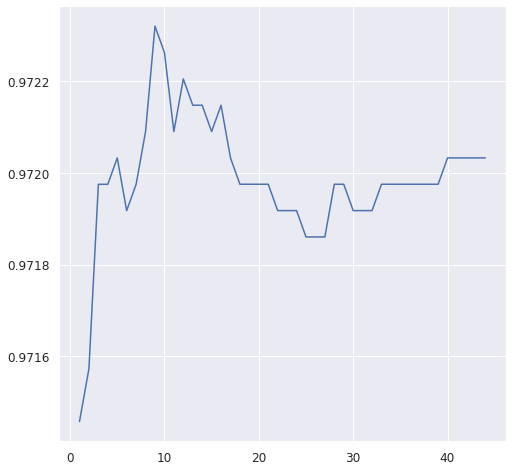

In [115]:
# graphique
plt.rcParams["figure.figsize"]=(15,7)
plt.plot(np.arange(1,45,1),sel.grid_scores_)
plt.title("Sélection de variable par validation croisée\n", fontsize=24)
plt.xlabel("Nombre de variables", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.savefig("select_var.jpeg")
plt.show()
# performance en validation croisée

In [116]:
# nombre de variables sélectionées
print(sel.n_features_)

9


In [117]:
# masque des variables sélectionnées
print(sel.support_)

[False  True False False False False False False  True  True False False
 False False False False False False False False  True False False  True
  True False False False False False False False False False  True False
 False False False False  True False False  True]


In [118]:
# le nom des variables sélectionnées
print(X_train.columns[sel.support_])

Index(['statut_compte_2', 'retard_courant_1', 'retard_courant_2',
       'solde_cour_autres_pct_lmte_4', 'solde_courant_3', 'solde_courant_4',
       'avances_courant_1', 'paiements_courant_4', 'pct_util_moy_4'],
      dtype='object')


### Avec les variables selectionnées

In [124]:
Xtrain2 = X_train[X_train.columns[sel.support_]]
Xtest2 = X_test[X_test.columns[sel.support_]]

model_var_sel = model.fit(Xtrain2, y_train)

In [125]:
#prediction en test avec le modèle sélectionné
pred_var_sel = model_var_sel.predict(Xtest2)

In [140]:
tmp2 = pd.DataFrame({"var":Xtrain2.columns,"coef":model_var_sel.coef_[0]})
tmp2#.sort_values(by='coef', ascending=False)

,var,coef
0,statut_compte_2,1.234280
1,retard_courant_1,-0.877050
2,retard_courant_2,0.876939
3,solde_cour_autres_pct_lmte_4,0.762232
4,solde_courant_3,0.934162
5,solde_courant_4,1.144191
6,avances_courant_1,-0.753689
7,paiements_courant_4,-0.904899
8,pct_util_moy_4,0.743853


In [128]:
print(np.unique(pred_var_sel, return_counts=True))

(array([0, 1]), array([7431,   33]))


In [126]:
# matrice de confusion
print(metrics.confusion_matrix(y_test,pred_var_sel))

[[7243    8]
 [ 188   25]]


In [127]:
# performance globlale
print(metrics.classification_report(y_test,pred_var_sel))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7251
           1       0.76      0.12      0.20       213

    accuracy                           0.97      7464
   macro avg       0.87      0.56      0.59      7464
weighted avg       0.97      0.97      0.96      7464



## Courbe de ROC

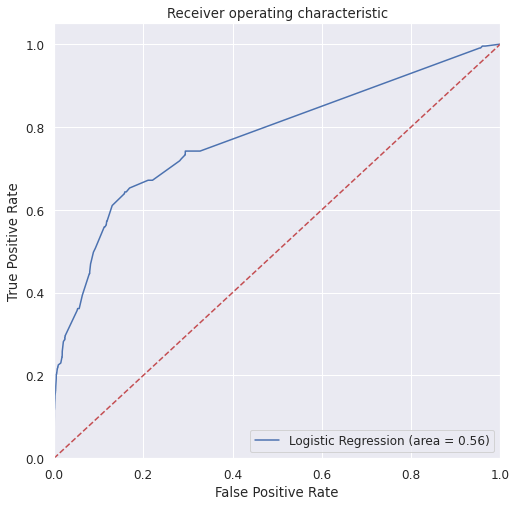

In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred_var_sel)
fpr, tpr, thresholds = roc_curve(y_test, model_var_sel.predict_proba(Xtest2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [141]:
model_var_sel.intercept_

array([-2.75160304])

[-2.75160304]
